<a href="https://colab.research.google.com/github/psyeatos/Fuzzy/blob/main/L%C3%B3gica_Fuzzy_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=dc88bade58d9bf67e5efe12be97b4756e0f1e28e20c0c40a3fa6434260e63437
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando o Antecedente ( Input )

In [14]:
temperatura = ctrl.Antecedent(np.arange(0, 38), "temperatura")
humidade = ctrl.Antecedent(np.arange(0, 101), "humidade")

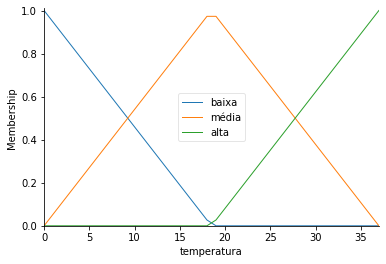

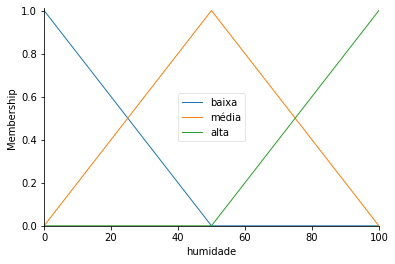

In [15]:
temperatura.automf(3, names=["baixa","média","alta"])
humidade.automf(3, names=["baixa","média","alta"])

temperatura.view()
humidade.view()

# Criando o Consequente ( Output ) 

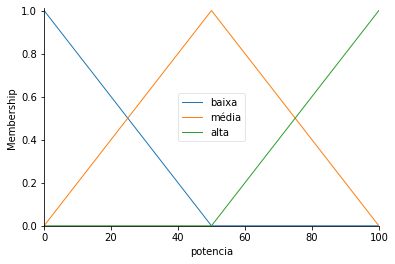

In [16]:
potencia = ctrl.Consequent(np.arange(0, 101), "potencia")

potencia.automf(3, names=["baixa","média","alta"])

potencia.view()

# Criando base de regras

In [22]:
regra1 = ctrl.Rule(temperatura["baixa"] & humidade["baixa"], potencia["alta"])
regra2 = ctrl.Rule(temperatura["baixa"] & humidade["média"], potencia["alta"])
regra3 = ctrl.Rule(temperatura["baixa"] & humidade["alta"], potencia["média"])
regra4 = ctrl.Rule(temperatura["média"] & humidade["baixa"], potencia["baixa"])
regra5 = ctrl.Rule(temperatura["média"] & humidade["média"], potencia["baixa"])
regra6 = ctrl.Rule(temperatura["média"] & humidade["alta"], potencia["média"])
regra7 = ctrl.Rule(temperatura["alta"] & humidade["baixa"], potencia["baixa"])
regra8 = ctrl.Rule(temperatura["alta"] & humidade["média"], potencia["média"])
regra9 = ctrl.Rule(temperatura["alta"] & humidade["alta"], potencia["alta"])

# Criando o Sistema Fuzzy

In [23]:
resposta_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,
                                    regra7,regra8,regra9])
resposta = ctrl.ControlSystemSimulation(resposta_ctrl)
resposta2 = ctrl.ControlSystemSimulation(resposta_ctrl)
resposta3 = ctrl.ControlSystemSimulation(resposta_ctrl)
resposta4 = ctrl.ControlSystemSimulation(resposta_ctrl)

# Testar valores

In [24]:
resposta.input["temperatura"] = 20
resposta.input["humidade"] = 30

resposta.compute()

resposta2.input["temperatura"] = 30
resposta2.input["humidade"] = 15

resposta2.compute()

resposta3.input["temperatura"] = 35
resposta3.input["humidade"] = 30

resposta3.compute()

resposta4.input["temperatura"] = 10
resposta4.input["humidade"] = 70

resposta4.compute()

In [25]:
print(resposta.output["potencia"])
print(resposta2.output["potencia"])
print(resposta3.output["potencia"])
print(resposta4.output["potencia"])

27.374640421171463
38.620703284511926
46.23188405797097
48.32757311406979


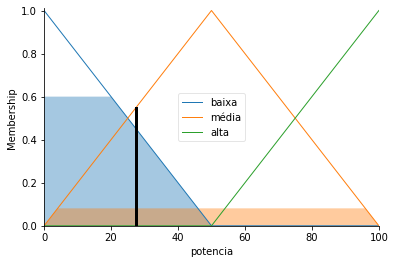

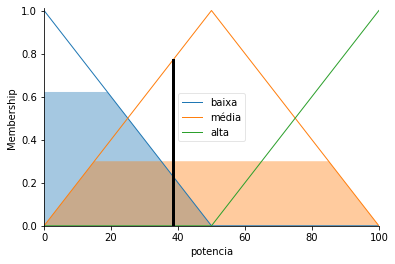

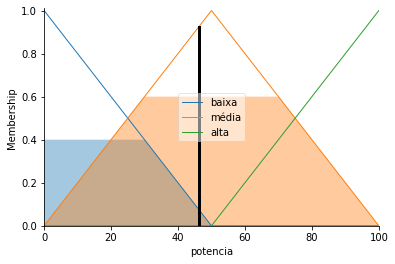

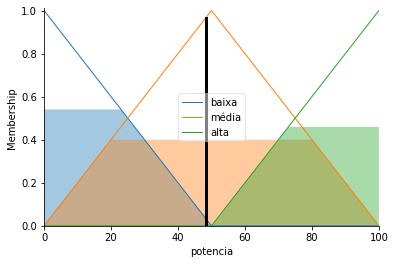

In [26]:
potencia.view(sim=resposta)
potencia.view(sim=resposta2)
potencia.view(sim=resposta3)
potencia.view(sim=resposta4)